<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.  Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Читаем исходник, видим, что данные склеены в один столбец, разъединим их. Разделитель "\t"

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t')
pd.options.display.max_columns = None #+ добавим опцию, чтобы посмотреть все столбцы
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получилось. Теперь посмотрим на содержимое.

In [3]:
data.info()
print(' ')
print('Значения в столбце total_images: ', data['total_images'].describe())
print(' ')
print('Значения в столбце last_price: ', data['last_price'].describe())
print(' ')
print('Значения в столбце total_area: ', data['total_area'].describe())
print(' ')
print('Значения в столбце rooms: ', data['rooms'].value_counts())
print(' ')
print('Значения в столбце ceiling_height: ', data['ceiling_height'].describe())
print(' ')
print('Значения в столбце floors_total: ', data['floors_total'].describe())
print(' ')
print('Значения в столбце living_area: ', data['living_area'].describe())
print(' ')
print('Значения в столбце floor: ', data['floor'].describe())
print(' ')
print('Значения в столбце is_apartment: ', data['is_apartment'].value_counts())
print(' ')
print('Значения в столбце studio: ', data['studio'].unique())
print(' ')
print('Значения в столбце open_plan: ', data['open_plan'].unique())
print(' ')
print('Значения в столбце kitchen_area: ', data['kitchen_area'].describe())
print(' ')
print('Значения в столбце balcony: ', data['balcony'].unique())
print(' ')
print('Значения в столбце locality_name: ', data['locality_name'].value_counts().head(20))
print(' ')
print('Значения в столбце airports_nearest: ', data['airports_nearest'].describe())
print(' ')
print('Значения в столбце cityCenters_nearest: ', data['cityCenters_nearest'].describe())
print(' ')
print('Значения в столбце parks_around3000: ', data['parks_around3000'].unique())
print(' ')
print('Значения в столбце parks_nearest: ', data['parks_around3000'].describe())
print(' ')
print('Значения в столбце ponds_around3000: ', data['ponds_around3000'].unique())
print(' ')
print('Значения в столбце ponds_nearest: ', data['ponds_nearest'].describe())
print(' ')
print('Значения в столбце days_exposition: ', data['days_exposition'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Выводы:

Всего 23699 строчек, 22 столбца.

Стобец Фото - ок.
    
Столбец Последняя цена - ок.
    
Столбец Общая площадь - ок.
    
**Столбец Дата размещения - необходимо переформатировать из object в date**
    
**Столбец Комнаты: есть нулевые значения, необходимо выяснить, что это.**
    
**Столбец Высота потолков - скорее всего есть завышенные значения (100метров), также есть пропуски - исправить**
    
**Столбец Всего этажей - указаны дома с завышенной этажностью (до 60 этажей), в СПБ самый высокий жилой дом - 37 этажей. Есть пропуски**
    
**Столбец Жилая площадь - есть пропуски**
    
Столбец Этаж - ок
    
**Столбец Апартаменты - есть много пропусков**
    
Столбец Студия - ок

Столбец Свободная планировка - ок   
    
**Столбец Кухня - есть пропуски**
    
**Столбец Балконы - есть пропуски. Также можно заменить на Есть/нет**
    
**Столбец Населенный пункт - есть дубли (напр. Кудрово и деревня Кудрово), есть пропуски**
    
**Столбец Расстояние до аэропорта - есть пропуски**
    
**Столбец Расстояние до центра - есть пропуски**
    
**Столбец Количество парков рядом и Ближайший парк - есть пропуски**
    
**Столбец Количество водоемов рядом и Ближайший водоем - есть пропуски**
    
**Столбец Период размещения - есть пропуски**
</div>

### Вывод

Жуть. Меньше слов - больше дела.

## Предобработка данных

Начнем по порядку со столбца Дата размещения, переформатируем его в корректный формат.

In [4]:



#в исходнике дата такая: 2019-03-07T00:00:00
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(data.head())
print(data['first_day_exposition'].describe())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object


Получилось. Теперь на всякий случай округлим значения до дней, нам не сильно важно, в каком часу было выставлено объявление - это все-таки квартира, а не носки.

In [5]:
data['first_day_exposition'] = data['first_day_exposition'].dt.floor('1D')
print(data['first_day_exposition'].describe())

count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object


Теперь столбец с количеством комнат, посмотрим, где там нули и какая у них площадь.

In [6]:
print(data.query('rooms == 0')['total_area'].describe())


count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64


Всего 197 строк, не так много, скорее всего человеческая опечатка либо баг привыгрузке. Кажется, что это однушки/студии, судя по площади. Построим гистограмму для наглядности. 

Площадь квартир с 0ми комнатами


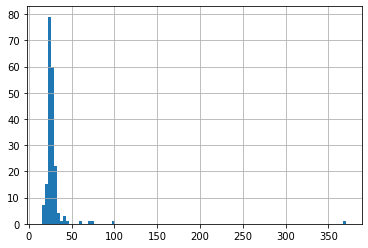

In [7]:
print('Площадь квартир с 0ми комнатами')
data.query('rooms == 0')['total_area'].hist(bins=100)
plt.show()

Так и есть, большинство меньше 60м2. Но тут есть выбросы с большой площадью, посмотри на них внимательнее

In [8]:
data.query('rooms == 0 and total_area > 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3458,6,7400000.0,73.6,2017-05-18,0,NaN,3.0,50.0,1,NaN,True,False,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7.0,NaN,6,NaN,False,True,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
20082,10,16300000.0,98.4,2017-11-08,0,3.10,5.0,60.5,2,NaN,True,False,NaN,NaN,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0
21227,0,8200000.0,71.0,2017-07-21,0,5.80,5.0,68.0,5,NaN,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0


Здесь минимум двушки, а квартира в 371 метр не меньше 4х комнат. Сделаем соответствующие замены.

In [9]:
data.loc[(data['total_area'] < 60) & (data['rooms'] == 0), 'rooms'] = 1
data.loc[(data['total_area'] > 60) & (data['total_area'] < 370) & (data['rooms'] == 0), 'rooms'] = 2
data.loc[(data['total_area'] > 370) & (data['rooms'] == 0), 'rooms'] = 4

print('Число строк с нулями в Комнатах', len(data.query('rooms == 0')))

Число строк с нулями в Комнатах 0


Дальше идет Высота потолков. Посмотрим гистограмму

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


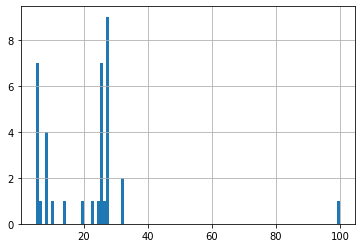

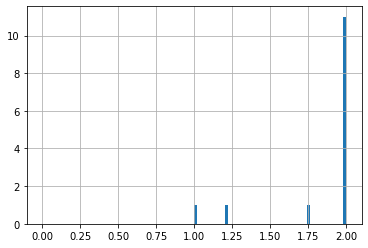

In [10]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=100, range=(5,100))
plt.show()
data['ceiling_height'].hist(bins=100, range=(0,2))

Заполненные данные в пределах нормы, но есть явные выбросы в 1 и 100 метров, посмотрим как много их. Предположим, что потолок ниже 2 метров и выше 6 метров это артефакт (в питере старый фонд бывает с очень высокими потолками высотой в 2 этажа).

In [11]:
data.query('ceiling_height <= 2 or ceiling_height > 6').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.20,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
552,11,2999000.0,33.50,2017-03-30,1,2.0,15.0,17.5,6,NaN,False,False,6.5,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27,3,2.0,5.0,40.0,4,NaN,False,False,6.0,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,14,2900000.0,75.00,2018-11-12,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.00,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4212,1,2120000.0,35.43,2017-12-18,1,2.0,18.0,16.6,9,NaN,False,False,8.8,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
4643,0,4300000.0,45.00,2018-02-01,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.00,2017-09-27,1,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.50,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.00,2017-10-13,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


43 строчки с неправильными потолками. И это скорее всего опечатка, по срезу в таблице видно, что под этими цифрами подразумевалась явно не высота потолков, а что-то другое. 

Но этот параметр вероятно очень сильно влияет на цену квартиры, и что-то выдумывать со средним лучше не стоит, поэтому можно исключть их. 

Однако здесь есть еще более серьезная проблема: почти в половине строк вообще **отсутствуют данные по высоте потолков**. Здесь катастрофой будет как заменить их на среднее/медиану, так и убрать из таблицы, поэтому оставим пропуски в этом столбце и сделаем пометку, что на этот параметр в дальнейшем опираться не следует. В теории можно попробовать вычислить одни и те же дома или заполнить пропуски в зависимости от этажности здания, но в первом варианте точность будет невысокой, а во второй вариант не подойдет, т.к. в питере очень разный жилой фонд: здания средней этажности могут быть как дореволюционными домами с гигантскими потолками, так и хрущевками, поэтому это гадание на кофейной гуще.

Причиной пропусков вероятно является лень или незнание пользователей, которые размещали объявления и просто не заполняли это поле, к сожалению.

In [12]:
#переменная с индексами "плохих" потолков
wrong_height = data.query('ceiling_height <= 2 or ceiling_height > 6').index
#убираем эти строки методом drop
data.drop(wrong_height, inplace = True)
#проверяем
data.query('ceiling_height <= 2 or ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Далее идет столбец Этажности дома.

count    23570.000000
mean        10.674968
std          6.593663
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
Общая этажность домов


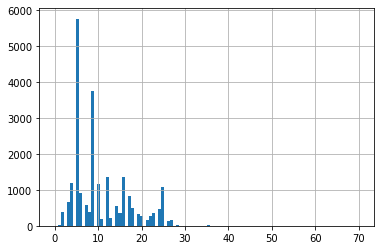

In [13]:
print(data['floors_total'].describe())
print('Общая этажность домов')
data['floors_total'].hist(bins=100, range=(0,70))
plt.show()

Посмотрим на объявления в домах якобы выше 37 этажей (напомним, что в СПБ это самый высокий жилой дом)

In [14]:
data.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Были бы фото этих домов, тогда все упроостилось бы. Предположим, что это опечатки. В первой строке у дома в Кронштадте к 6ке добавили ноль, тогда 4 этаж из 6 похож на правду. Во второй строке у питерской 25этажки перепутали местами цифры, тоже результат будет похож на правду. Внесем изменения в таблицу.

In [15]:
data['floors_total'] = data['floors_total'].replace(60,6)
data['floors_total'] = data['floors_total'].replace(52,25)
data.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Проверим, как много пропусков в этом столбце

In [16]:
print('Строк с пропусками в Этажности', data['floors_total'].isna().sum())
floors_total_nan = data[data['floors_total'].isna()]
floors_total_nan.head()

Строк с пропусками в Этажности 86


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Всего 86 строк, не так много относительно 23 тысяч, поэтому не будем мучаться и удалим их. Причиной их появления, скорее всего, также является пользователь, который просто не ввел данные.

In [17]:
data.dropna(subset=['floors_total'], inplace = True)
print('Строк с пропусками в Этажности', data['floors_total'].isna().sum())

Строк с пропусками в Этажности 0


Сейчас посмотрим пропуски в жилой площади

In [18]:
print('Строк с пропусками в Жилой площади', data['living_area'].isna().sum())
living_area_nan = data[data['living_area'].isna()]

#посмотрим зависимость жилой площади от количества комнат, чтобы заполинть пропуски
#введем столбец с отношением жилой площади к общей, она должна быть везде примерно одинаковой
data['living_area_multiplier'] = data['living_area'] / data['total_area']

#построим сводную с этим отношением для разного количества комнат
data.pivot_table(index='rooms', values='living_area_multiplier', aggfunc='mean')

Строк с пропусками в Жилой площади 1868


,living_area_multiplier
rooms,
1,0.490756
2,0.579518
3,0.625462
4,0.646581
5,0.641377
6,0.670108
7,0.657981
8,0.667001
9,0.612299


Получившиеся данные довольно реалистичны: для однушек и двушек соотношение меньше всех, что логично, а начиная с 3-хкомнатных оно примерно одинаково. 

Поэтому заполним пропуски в Жилой площади, умножив Общую плошадь на множитель, соответствующий количеству комнат в квартире.

In [19]:
print ('Пропуски до: ', data['living_area_multiplier'].isna().sum())

#добавим в строки с пропусками средние значения множителя 
for rooms in data['rooms'].unique():
    mean = data.loc[data['rooms'] == rooms, 'living_area_multiplier'].mean()
    print(rooms, '{:.2f}'.format(mean))
    data.loc[ (data['living_area'].isna()) & (data['rooms'] == rooms), 'living_area_multiplier'] = mean


print ('Пропуски после: ', data['living_area_multiplier'].isna().sum())

#и умножаем общую площать на множитель
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * data.loc[data['living_area'].isna(), 'living_area_multiplier']
print('Строк с пропусками в Жилой площади', data['living_area'].isna().sum())


Пропуски до:  1868
3 0.63
1 0.49
2 0.58
4 0.65
5 0.64
6 0.67
7 0.66
11 0.71
8 0.67
14 0.65
10 0.65
15 0.69
9 0.61
19 0.71
16 0.67
12 0.46
Пропуски после:  0
Строк с пропусками в Жилой площади 0


Следующий на очереди столбец Апартаментов

In [20]:
print('Пропусков в Апартаментах ', data['is_apartment'].isna().sum())
data['is_apartment'].value_counts()


Пропусков в Апартаментах  20809


False    2714
True       47
Name: is_apartment, dtype: int64

Всего 47 апартаментов на всю базу и 20 тысяч пропусков. Скорее всего пользователи не делали отметку, т.к. у нас по умолчанию объявления по продаже именно жилой недвижимости. Поэтому заменим пропуски на False

In [21]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

print('Пропусков в Апартаментах ', data['is_apartment'].isna().sum())
data['is_apartment'].value_counts()

Пропусков в Апартаментах  0


False    23523
True        47
Name: is_apartment, dtype: int64

Далее столбец с Площадью кухни.

In [22]:
print(data['kitchen_area'].isna().sum())
data[data['kitchen_area'].isna()].head(10)

2223


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,99.448435,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.625462
30,12,2200000.0,32.8,2018-02-19,1,NaN,9.0,16.096788,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,0.490756
37,10,1990000.0,45.8,2017-10-28,2,2.5,5.0,26.541926,1,False,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,0.579518
44,13,5350000.0,40.0,2018-11-18,1,NaN,22.0,19.630229,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,0.490756
59,15,6300000.0,46.5,2017-03-06,1,NaN,13.0,22.820141,13,False,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,0.490756
60,3,2740000.0,35.0,2018-01-01,1,NaN,12.0,17.176450,8,False,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.490756
81,9,10949000.0,68.0,2018-12-27,1,NaN,10.0,33.371389,6,False,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490756
82,3,4500000.0,80.5,2018-01-15,3,NaN,25.0,50.349679,16,False,False,False,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0,0.625462
133,12,3150000.0,31.0,2018-03-23,1,NaN,25.0,15.213427,6,False,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0,0.490756
144,1,2450000.0,27.0,2017-03-30,1,NaN,24.0,15.500000,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,0.574074


Посмотрим, какие квартиры у нас без площади кухни: сколько комнат и какая площадь.

Площадь квартир с пропусками в площади кухни


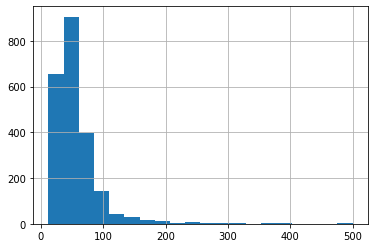

Количество комнат у квартир с пропусками в площади кухни


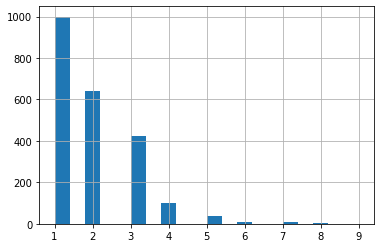

In [23]:
kitchen_nan = data[data['kitchen_area'].isna()]
print('Площадь квартир с пропусками в площади кухни')
kitchen_nan['total_area'].hist(bins=20)
plt.show()
print('Количество комнат у квартир с пропусками в площади кухни')
kitchen_nan['rooms'].hist(bins=20)
plt.show()

Разброс большой: есть как большие, так и маленькие квартиры, то есть тут закономерности нет. Значит снова пользователи не заполнили эту строку.

Тогда заполним их аналогично, как мы заполнили пропуски у Жилой площади: в зависимости от количества комнат.

In [24]:
#введем столбец с отношением площади кухни к общей
data['kitchen_area_multiplier'] = data['kitchen_area'] / data['total_area']

#построим сводную с этим отношением для разного количества комнат, доля кухни должна уменьшаться с увеличением количества комнат
data.pivot_table(index='rooms', values='kitchen_area_multiplier', aggfunc='mean')

,kitchen_area_multiplier
rooms,
1,0.249893
2,0.174148
3,0.140869
4,0.124127
5,0.113455
6,0.103428
7,0.091932
8,0.091708
9,0.075054


Такой множитель похож на правду: чем меньше квартира, тем больше там доля площади кухни.

Применим этот множитель на пропуски

In [25]:
print ('Пропуски до: ', data['kitchen_area_multiplier'].isna().sum())

#добавим в строки с пропусками средние значения множителя 
for rooms in data['rooms'].unique():
    mean = data.loc[data['rooms'] == rooms, 'kitchen_area_multiplier'].mean()
    print(rooms, '{:.2f}'.format(mean))
    data.loc[ (data['kitchen_area'].isna()) & (data['rooms'] == rooms), 'kitchen_area_multiplier'] = mean


print ('Пропуски после: ', data['living_area_multiplier'].isna().sum())

#и умножаем общую площать на множитель
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area'] * data.loc[data['kitchen_area'].isna(), 'kitchen_area_multiplier']
print('Строк с пропусками в Площади кухни', data['kitchen_area'].isna().sum())

Пропуски до:  2223
3 0.14
1 0.25
2 0.17
4 0.12
5 0.11
6 0.10
7 0.09
11 0.07
8 0.09
14 0.08
10 0.09
15 0.17
9 0.08
19 0.07
16 0.05
12 0.12
Пропуски после:  0
Строк с пропусками в Площади кухни 0


Далее столбец Балконы.

In [26]:
print('Значения в столбце balcony: ', data['balcony'].unique())

Значения в столбце balcony:  [nan  2.  0.  1.  5.  4.  3.]


Пропуски здесь явно означают, что балкона там нет. И количество балконов влияет на стоимость квартиры в последнюю очередь, поэтому приведем здесь данные к более простому виду: True и False

In [27]:
data.loc[data['balcony'].isna(), 'balcony'] = False
data.loc[data['balcony'] == 0, 'balcony'] = False
data.loc[data['balcony'] == 1, 'balcony'] = True
data.loc[data['balcony'] == 2, 'balcony'] = True
data.loc[data['balcony'] == 3, 'balcony'] = True
data.loc[data['balcony'] == 4, 'balcony'] = True
data.loc[data['balcony'] == 5, 'balcony'] = True

#for balcony in data['balcony'].unique():
    #if balcony in (1,2,3,4,5): 
    #    return True
    #if balcony == 0: 
    #    return False

print('Значения в столбце balcony: ', data['balcony'].unique())

Значения в столбце balcony:  [False  True]


Далее стобец Населенный пункт.

In [28]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15630
посёлок Мурино         518
посёлок Шушары         439
Всеволожск             397
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 235
Name: locality_name, dtype: int64

Подретушируем названия, уберем слова типа Село, Деревня и т.д.

In [29]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок станции ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('село ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('деревня ', '', regex=True)

data['locality_name'].value_counts().head(20)

Санкт-Петербург    15630
Мурино               584
Кудрово              469
Шушары               439
Всеволожск           397
Пушкин               369
Колпино              338
Парголово            327
Гатчина              306
Выборг               235
Петергоф             201
Сестрорецк           183
Красное Село         175
Новое Девяткино      143
Сертолово            142
Ломоносов            133
Кириши               125
Бугры                113
Сланцы               112
Волхов               110
Name: locality_name, dtype: int64

И посмотрим здесь пропуски

In [30]:
print('Строк с пропусками в НасПункте', data['locality_name'].isna().sum())
locality_name_nan = data[data['locality_name'].isna()]
locality_name_nan.head(10)

Строк с пропусками в НасПункте 48


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier
1097,3,8600000.0,81.7,2016-04-15,3,3.55,5.0,50.800000,2,False,False,False,8.800000,False,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,0.621787,0.107711
2033,6,5398000.0,80.0,2017-05-30,3,NaN,4.0,42.600000,2,False,False,False,18.600000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,0.532500,0.232500
2603,20,3351765.0,42.7,2015-09-20,1,NaN,24.0,15.600000,3,False,False,False,10.700000,False,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,0.365340,0.250585
2632,2,5130593.0,62.4,2015-10-11,2,NaN,24.0,33.100000,21,False,False,False,8.200000,False,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,0.530449,0.131410
3574,10,4200000.0,46.5,2016-05-28,2,NaN,5.0,30.800000,5,False,False,False,6.500000,False,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,0.662366,0.139785
4151,17,17600000.0,89.5,2014-12-09,2,3.00,8.0,39.620000,7,False,False,False,13.380000,False,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,0.442682,0.149497
4189,7,9200000.0,80.0,2015-12-10,3,4.00,4.0,52.300000,3,False,False,False,10.400000,False,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,0.653750,0.130000
4670,1,5500000.0,83.0,2015-08-14,3,NaN,7.0,51.913334,6,False,False,False,11.692139,False,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,0.625462,0.140869
5343,19,13540000.0,85.5,2016-01-20,3,NaN,7.0,59.100000,5,False,False,False,8.300000,True,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,0.691228,0.097076
5707,7,3700000.0,30.0,2016-04-29,1,NaN,24.0,20.000000,23,False,False,False,7.496778,False,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,0.666667,0.249893


Опять кто-то не вписал город. Как интерфейс дал опубликовать такое объявление?.. Можно попробовать вычислить населенный пункт по данным расстояний до центра и аэропорта, но здесь 48 строк нам погоду не сделают, поэтому проще удалить их.

In [31]:
data.dropna(subset=['locality_name'], inplace = True)
print('Строк с пропусками в Населенном пункте', data['locality_name'].isna().sum())

Строк с пропусками в Населенном пункте 0


Далее столбец Расстояние до аэропорта, точнее пропуски там

In [32]:
print('Строк с пропусками в Аэропорте', data['airports_nearest'].isna().sum())
#сразу посмотрим, где значения нереалистично малы, ведь нельзя строить жилые дома в непосредственной близости от аэропорта
data.query('airports_nearest < 1000')

Строк с пропусками в Аэропорте 5505


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,True,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,0.570605,0.172911


5 с половиной тысяч пропусков это очень много. Это скорее всего не сработал картографический алгоритм. Можно смело кинуть разработчикам багрепорт на эту тему. И заменим тогда пропуски медианой у группировок по населенным пунктам

Ну а квартира на взлетной полосе попалась всего одна, удалим ее.

In [33]:
#переменная с индексами "плохих" аэропортов
wrong_airports_nearest = data.query('airports_nearest < 1000').index
#убираем эти строки методом drop
data.drop(wrong_airports_nearest, inplace = True)
data.query('airports_nearest < 1000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier


In [34]:
print ('Пропуски до: ', data['airports_nearest'].isna().sum())

#вычислим медиану в группах по нас.пункту и поставим ее в пропуски
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'airports_nearest'].median()
    print(locality_name, '{:.2f}'.format(median))
    data.loc[ (data['airports_nearest'].isna()) & (data['locality_name'] == locality_name), 'airports_nearest'] = median

print ('Пропуски после: ', data['airports_nearest'].isna().sum())

Пропуски до:  5505
Санкт-Петербург 26758.00
Шушары 17427.00
Янино-1 nan
Парголово 53426.00
Мурино nan
Ломоносов 48415.50
Сертолово nan
Петергоф 39231.00
Пушкин 15766.00
Кудрово nan
Коммунар nan
Колпино 26232.00
Красный Бор nan
Гатчина nan
Федоровское nan
Выборг nan
Кронштадт 67847.00
Кировск nan
Новое Девяткино nan
Металлострой 25758.00
Лебяжье nan
Сиверский nan
Молодцово nan
Кузьмоловский nan
Новая Ропша nan
Павловск 20529.50
Пикколово nan
Всеволожск nan
Волхов nan
Кингисепп nan
Приозерск nan
Сестрорецк 56692.00
Куттузи nan
Аннино nan
Ефимовский nan
Плодовое nan
Заклинье nan
Торковичи nan
Первомайское nan
Красное Село 25730.00
Понтонный 30642.00


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Сясьстрой nan
Старая nan
Лесколово nan
Новый Свет nan
Сланцы nan
Путилово nan
Ивангород nan
Шлиссельбург nan
Никольское nan
Зеленогорск 72282.00
Сосновый Бор nan
Оржицы nan
Кальтино nan
Романовка nan
Бугры nan
Рощино nan
Кириши nan
Луга nan
Волосово nan
Отрадное nan
Павлово nan
Оредеж nan
Копорье nan
Молодежное 84665.00
Тихвин nan
Победа nan
Нурма nan
Синявино nan
Тосно nan
Стрельна 28317.00
Бокситогорск nan
Александровская 12896.50
Лопухинка nan
Пикалево nan
Терволово nan
Советский nan
Подпорожье nan
Петровское nan
Токсово nan
Сельцо nan
Вырица nan
Кипень nan
Келози nan
Вартемяги nan
Тельмана nan
Севастьяново nan
Большая Ижора nan
Агалатово nan
Новогорелово nan
Лесогорский nan
Лаголово nan
Цвелодубово nan
Рахья nan
Белогорка nan
Заводской nan
Новоселье nan
Большие Колпаны nan
Горбунки nan
Батово nan
Заневка nan
Иссад nan
Приморск nan
Мистолово nan
Новая Ладога nan
Зимитицы nan
Барышево nan
Разметелево nan
имени Свердлова nan
Пеники nan
Рябово nan
Пудомяги nan
Корнево nan
Низино nan
Бе

Пропусков заолнилось совсем ничего, видимо у большинсва уникальных нас.пунктов не было данных о расстоянии до аэропорта в принципе. Придется оставить так.

Следующий столбец с Расстоянием до центра

In [35]:
print('Строк с пропусками в Расстоянии до центра', data['cityCenters_nearest'].isna().sum())

Строк с пропусками в Расстоянии до центра 5482


Здесь та же ситуация, что и в случае Аэропортов: сбой картографического сервиса. Попробуем заполнить пропуски.

In [36]:
print ('Пропуски до: ', data['cityCenters_nearest'].isna().sum())

#вычислим медиану в группах по нас.пункту и поставим ее в пропуски
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    #print(locality_name, '{:.2f}'.format(median))
    data.loc[ (data['cityCenters_nearest'].isna()) & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median

print ('Пропуски после: ', data['cityCenters_nearest'].isna().sum())

Пропуски до:  5482
Пропуски после:  5413


Снова аналогично аэропортам, придется так оставить.

Теперь возьмемся за парки и будем рассматривать оба столбца: Расстояние до ближайшего и Количество рядом

Строк с пропусками в Количество парков 5481
Строк с пропусками в Расстояние до ближайшего парка Количество парков 15503
 
Статистика по количеству парков рядом


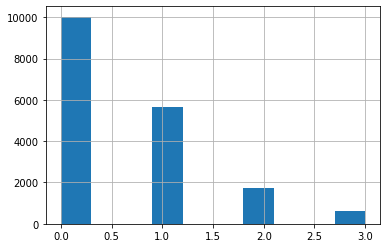

In [37]:
print('Строк с пропусками в Количество парков', data['parks_around3000'].isna().sum())
print('Строк с пропусками в Расстояние до ближайшего парка Количество парков', data['parks_nearest'].isna().sum())
print(' ')
print('Статистика по количеству парков рядом')
data['parks_around3000'].hist(bins=10)
plt.show()

Сначала посмотрим, что стоит в Расстоянии у сток с пропуском количества. Если там ничего нет, тогда заменим здесь количество на 0

In [38]:
data[data['parks_around3000'].isna()]['parks_nearest'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: parks_nearest, dtype: float64

Все так, сюрпризов там нет, тогда меняем пропуск на ноль. Вероятно, пользователь поленился в этом месте.

In [39]:
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0
print('Строк с пропусками в Количество парков', data['parks_around3000'].isna().sum())

Строк с пропусками в Количество парков 0


Теперь проверим, обоснованы ли пропуски в Расстоянии, если рядом парков нет

In [40]:
data.query('parks_around3000 == 0')['parks_nearest'].describe()

count       4.000000
mean     3114.250000
std        89.912457
min      3013.000000
25%      3051.250000
50%      3127.000000
75%      3190.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Логика подтвердилась, но тут есть 4 выброса: картография сказала что парков в радиусе 3км нет, но поставила расстояние 3013-3019м. Видимо тоже какой-то баг, и эти значения лучше опустить. Поэтому лучше в принципе удалим такие значения.

In [41]:
data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = ''

print('Строк с пропусками в Количество парков', data['parks_around3000'].isna().sum())
print('Строк с пропусками в Расстояние до ближайшего парка', data['parks_nearest'].isna().sum())
data['parks_nearest'].describe()

Строк с пропусками в Количество парков 0
Строк с пропусками в Расстояние до ближайшего парка 0


count     23521
unique      992
top            
freq      15507
Name: parks_nearest, dtype: object

Заметим, что при замене пропусков столбец Расстояния принял тип object, что затрдунит расчеты в будущем, поэтому заменим его сразу на корректный.

In [42]:
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'])
print('Пустых строк с Расстояним до ближайшего парка ', data['parks_nearest'].isnull().sum())
data['parks_nearest'].describe()

Пустых строк с Расстояним до ближайшего парка  15507


count    8014.000000
mean      489.250437
std       336.755249
min         1.000000
25%       287.250000
50%       455.000000
75%       612.000000
max      2984.000000
Name: parks_nearest, dtype: float64

Получается, что в 5 тысячах случаев пользователи скорее всего не указали наличие парка, а в остальных 10 тысячах стоят пропуски абсолютно логично, т.к. в графе количество парков стоит 0, значит и расстояние неоткуда брать.

Теперь посмотрим на столбцы, только про водоемы

Строк с пропусками в Количество водоемов 5481
Строк с пропусками в Расстояние до ближайшего водоема  14498
 
Статистика по количеству водоемов рядом


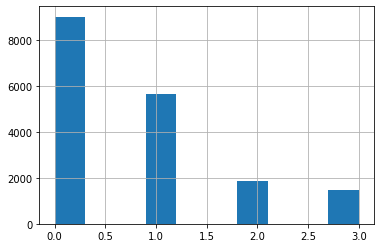

In [43]:
print('Строк с пропусками в Количество водоемов', data['ponds_around3000'].isna().sum())
print('Строк с пропусками в Расстояние до ближайшего водоема ', data['ponds_nearest'].isna().sum())
print(' ')
print('Статистика по количеству водоемов рядом')
data['ponds_around3000'].hist(bins=10)
plt.show()

Ситуация похожа на Парки, теперь просто проверим теми же методами.

Смотрим, что стоит в Расстоянии у сток с пропуском количества, меняем количество на 0, если ничего нет

In [44]:
print(data[data['ponds_around3000'].isna()]['ponds_nearest'].describe())

data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0
print('Строк с пропусками в Количество водоемов', data['ponds_around3000'].isna().sum())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ponds_nearest, dtype: float64
Строк с пропусками в Количество водоемов 0


Теперь проверим, обоснованы ли пропуски в Расстоянии, если рядом водоемов нет

In [45]:
data.query('ponds_around3000 == 0')['ponds_nearest'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ponds_nearest, dtype: float64

Тут даже выбросов нет, как у парков, все по нулям.

In [46]:
data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'] = ''

print('Строк с пропусками в Количество водоемов', data['ponds_around3000'].isna().sum())
print('Строк с пропусками в Расстояние до ближайшего водоема', data['ponds_nearest'].isna().sum())
data['ponds_nearest'].describe()

Строк с пропусками в Количество водоемов 0
Строк с пропусками в Расстояние до ближайшего водоема 0


count     23521
unique     1097
top            
freq      14498
Name: ponds_nearest, dtype: object

Все пропуски убрали, теперь также переформатируем столбец в цифры.

In [47]:
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'])
print('Пустых строк с Расстояним до ближайшего водоема ', data['ponds_nearest'].isnull().sum())
data['ponds_nearest'].describe()

Пустых строк с Расстояним до ближайшего водоема  14498


count    9023.000000
mean      518.527873
std       277.960798
min        13.000000
25%       293.500000
50%       503.000000
75%       730.500000
max      1344.000000
Name: ponds_nearest, dtype: float64

Как и предполагалось, ситуация идентичная со столбцами Парков.

Заключительный столбец про период размещения.

In [48]:
print(data['days_exposition'].isna().sum())
data['days_exposition'].describe()

3162


count    20359.000000
mean       180.803821
std        219.827108
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Больше 3 тысяч объявлений без указания периода размещения. Может они сейчас активны?

2014-11-27 00:00:00
2019-05-03 00:00:00

Дата публикации объявлений с пропусками в периоде размещения


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


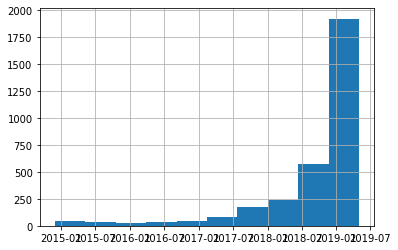

In [49]:
print(data[data['days_exposition'].isna()]['first_day_exposition'].min())
print(data[data['days_exposition'].isna()]['first_day_exposition'].max())
print('')
print('Дата публикации объявлений с пропусками в периоде размещения')
data[data['days_exposition'].isna()]['first_day_exposition'].hist(bins=10)
plt.show()

Не подтвердилось, дата публикаций этих объявлений размыта на все 5 лет. Видимо это гигантский артефакт, с которым придется жить, т.к. логичных способов заполнить это поле нет.

Еще раз взглянем на таблицу.

In [50]:
data = data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23521 entries, 0 to 23520
Data columns (total 25 columns):
index                      23521 non-null int64
total_images               23521 non-null int64
last_price                 23521 non-null float64
total_area                 23521 non-null float64
first_day_exposition       23521 non-null datetime64[ns]
rooms                      23521 non-null int64
ceiling_height             14437 non-null float64
floors_total               23521 non-null float64
living_area                23521 non-null float64
floor                      23521 non-null int64
is_apartment               23521 non-null bool
studio                     23521 non-null bool
open_plan                  23521 non-null bool
kitchen_area               23521 non-null float64
balcony                    23521 non-null bool
locality_name              23521 non-null object
airports_nearest           18108 non-null float64
cityCenters_nearest        18108 non-null float64
parks

## Расчёты и добавление результатов в таблицу

Посчитаем цену квадратного метра и добавим в таблицу столбцы с готом, месяцем и днем недели публикации объявления.

In [51]:
data['square_price'] = data['last_price']/data['total_area']
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier,square_price,weekday_exposition,month_exposition,year_exposition
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,120370.370370,3,3,2019
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,False,False,11.000000,True,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,82920.792079,1,12,2018
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,False,False,8.300000,False,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92785.714286,3,8,2015
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,99.448435,9,False,False,False,22.398194,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.625462,0.140869,408176.100629,4,7,2015
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.000000,1,6,2018


Теперь добавим столбец с указанием этажа: первый он, последний или другой.
Возьмем следующие данные: первый  - 1, последний - 2, другой - 0

In [52]:
def floor_type(row_values):
    if row_values['floor'] == 1: return 1
    result = row_values['floors_total'] - row_values['floor']
    if result == 0: return 2
    return 0

data['floor_type'] = data.apply(floor_type, axis = 1)
data.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier,square_price,weekday_exposition,month_exposition,year_exposition,floor_type
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,120370.370370,3,3,2019,0
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,False,False,11.000000,True,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,82920.792079,1,12,2018,1
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,False,False,8.300000,False,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92785.714286,3,8,2015,0
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,99.448435,9,False,False,False,22.398194,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.625462,0.140869,408176.100629,4,7,2015,0
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.000000,1,6,2018,0


## Исследовательский анализ данных

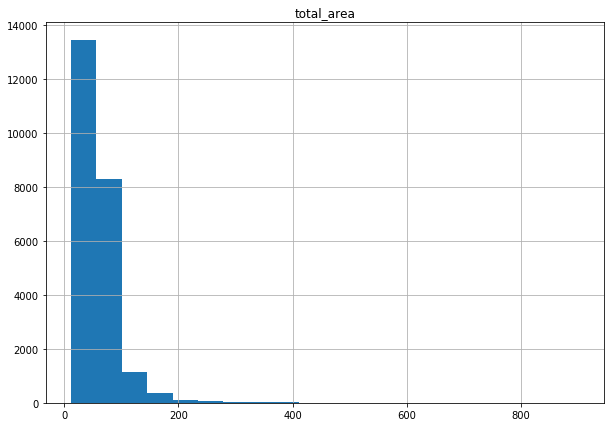

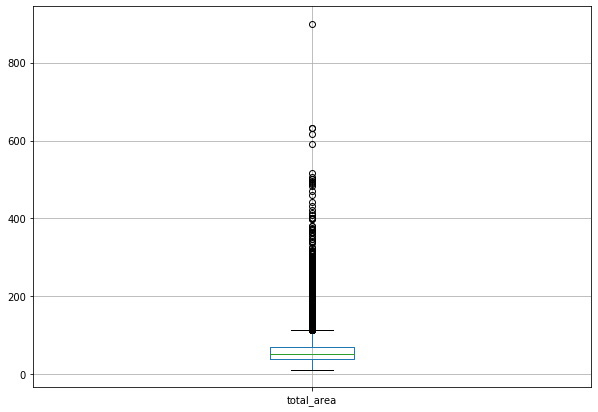

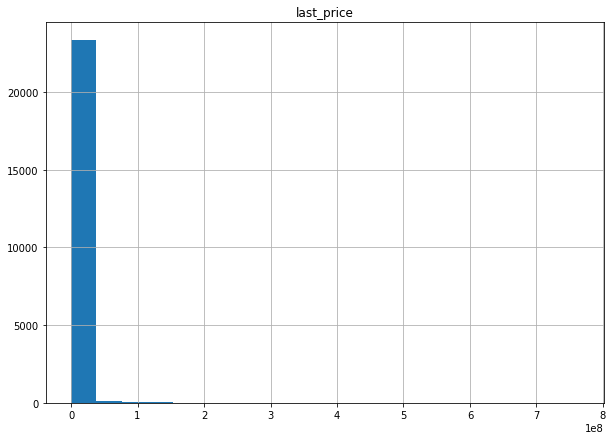

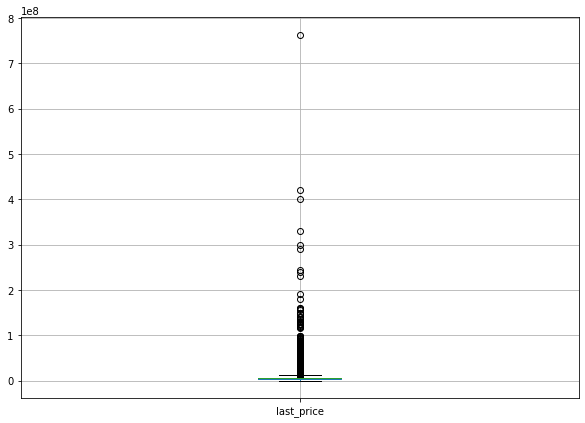

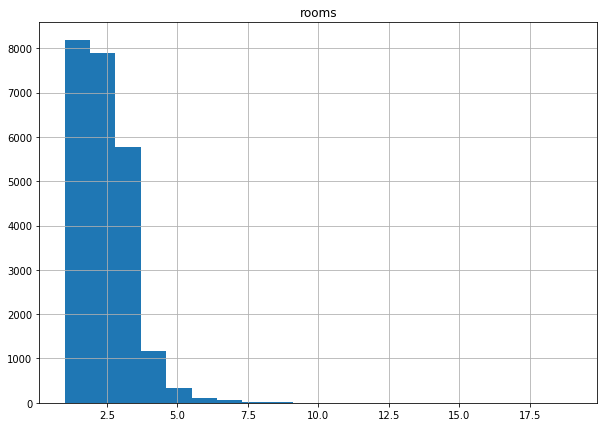

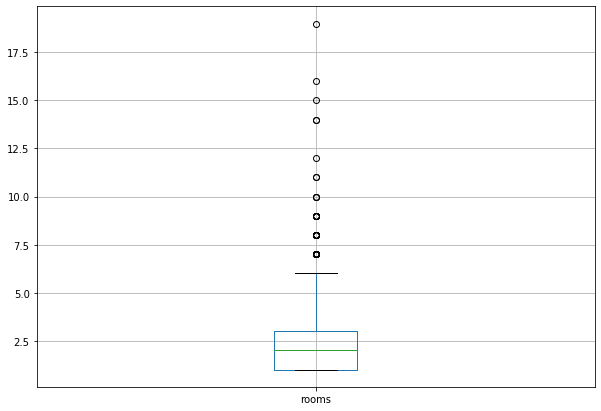

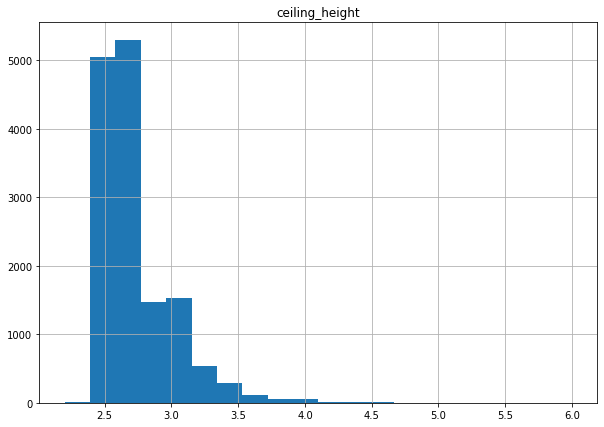

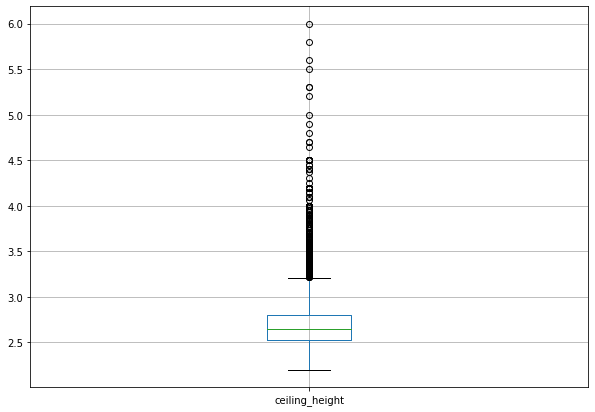

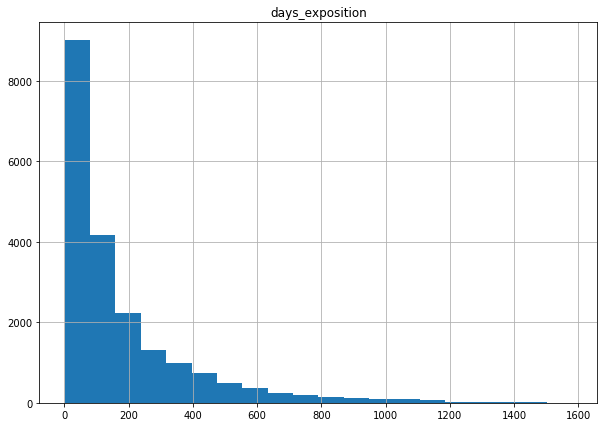

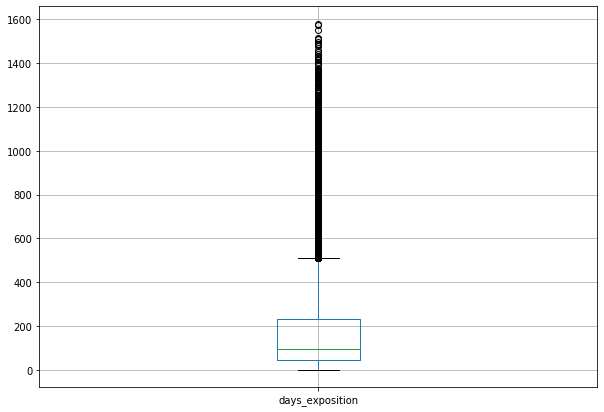

In [53]:
cols = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for col in cols:
    plt.figure(figsize=(10,7))
    plt.title(col)
    data[col].hist(bins = 20)
    plt.show()
    plt.figure(figsize=(10,7))
    data.boxplot(column=col)
    plt.show()

По очереди изучим параметры. Сначала Площадь.

Общая площадь


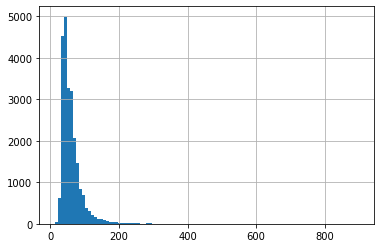

Общая площадь: диаграмма рассеяния


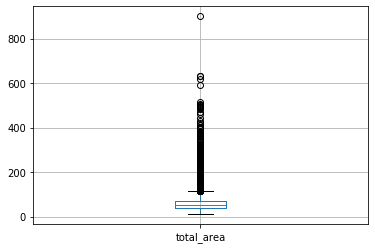

count    23521.000000
mean        60.341683
std         35.679199
min         12.000000
25%         40.000000
50%         52.000000
75%         69.710000
max        900.000000
Name: total_area, dtype: float64

In [54]:
print('Общая площадь')
data['total_area'].hist(bins = 100)
plt.show()
print('Общая площадь: диаграмма рассеяния')
data.boxplot(column='total_area')
plt.show()
data['total_area'].describe()

Тут еще присутствуют квартиры с очень маленькой площадью (12м2), но это скорее всего даже не квартиры, а комнаты, поэтому выбросами их считать нельзя. 

Также есть хоромы до 900м2 - вот эти квартиры точно выбросы. Таких квартир единицы, и массовый спрос на них не распространяется, поэтому лучше на них не смотреть. Сделаем отдельную таблицу good_data без этих объявлений.



In [55]:
data.query('total_area > 150')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier,square_price,weekday_exposition,month_exposition,year_exposition,floor_type
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,99.448435,9,False,False,False,22.398194,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.625462,0.140869,408176.100629,4,7,2015,0
42,42,13,22000000.0,161.8,2015-07-08,4,2.80,4.0,80.900000,2,False,False,False,17.600000,True,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,0.500000,0.108776,135970.333745,2,7,2015,0
51,51,7,45000000.0,161.0,2017-10-17,3,3.20,8.0,38.000000,4,False,False,False,50.000000,False,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0,0.236025,0.310559,279503.105590,1,10,2017,0
121,121,20,33000000.0,180.0,2017-02-17,3,2.90,9.0,86.000000,8,False,False,False,24.000000,True,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,0.477778,0.133333,183333.333333,4,2,2017,0
147,147,10,27700000.0,179.6,2017-07-06,5,2.85,25.0,97.200000,25,False,False,False,33.800000,True,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,75.0,0.541203,0.188196,154231.625835,3,7,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23224,23400,17,30000000.0,213.0,2017-09-28,7,3.40,5.0,151.400000,5,False,False,False,30.800000,False,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0,0.710798,0.144601,140845.070423,3,9,2017,2
23272,23448,3,14700000.0,180.0,2018-02-08,6,3.00,6.0,126.000000,5,False,False,False,20.000000,False,Санкт-Петербург,23955.0,5089.0,0.0,NaN,2.0,616.0,NaN,0.700000,0.111111,81666.666667,3,2,2018,0
23315,23491,20,21800000.0,250.0,2017-09-16,3,NaN,12.0,104.000000,7,False,False,False,45.000000,False,Санкт-Петербург,43558.0,13138.0,0.0,NaN,0.0,NaN,49.0,0.416000,0.180000,87200.000000,5,9,2017,0
23373,23549,5,19600000.0,184.0,2016-04-21,3,3.00,19.0,55.700000,19,False,False,False,24.500000,True,Санкт-Петербург,18995.0,4837.0,0.0,NaN,0.0,NaN,205.0,0.302717,0.133152,106521.739130,3,4,2016,2


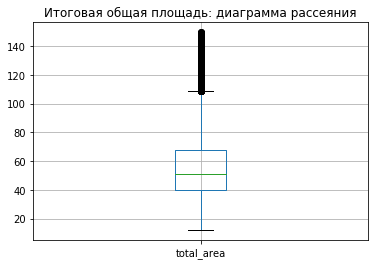

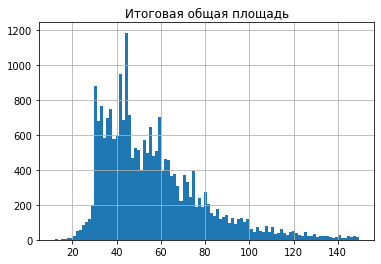

count    22942.000000
mean        56.462233
std         22.797698
min         12.000000
25%         40.000000
50%         51.000000
75%         67.600000
max        149.600000
Name: total_area, dtype: float64

In [56]:
#всего 561 квартира свыше 150м2 - приемлимо

good_data = data.query('total_area < 150')
plt.title('Итоговая общая площадь: диаграмма рассеяния')
good_data.boxplot(column='total_area')
plt.show()
plt.title('Итоговая общая площадь')
good_data['total_area'].hist(bins = 100)
plt.show()
good_data['total_area'].describe()

Данные по площади теперь похожи на правду, 75% составляют квартиры с площадью не более 67м2, медиана проходит по площади в 51м2. 

Теперь цена.

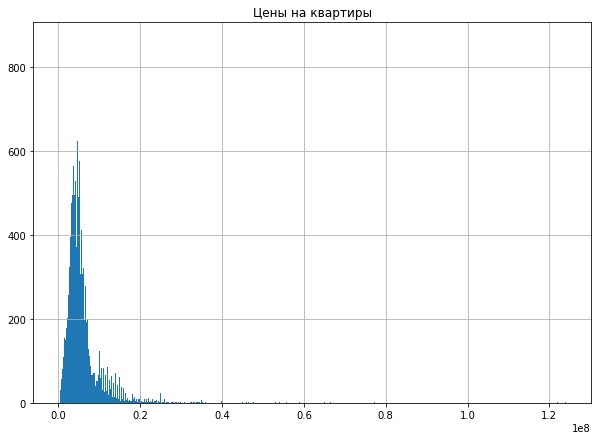

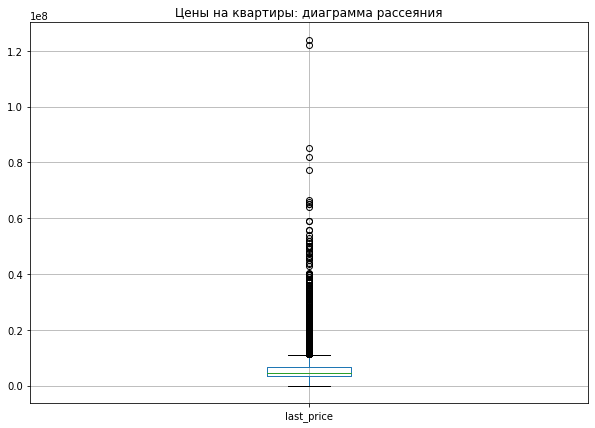

count       22942
mean      5683439
std       4506064
min         12190
25%       3400000
50%       4580000
75%       6500000
max     124000000
Name: last_price, dtype: float64

In [57]:
#добавим условие, чтобы цена выводилась не в экспоненте
pd.set_option('display.float_format', lambda x: '%.0f' % x)

plt.figure(figsize=(10,7))
plt.title('Цены на квартиры')
good_data['last_price'].hist(bins = 1000)
plt.show()

plt.figure(figsize=(10,7))
plt.title('Цены на квартиры: диаграмма рассеяния')
good_data.boxplot(column='last_price')
plt.show()
good_data['last_price'].describe()

График портят квартиры с гигантской ценой, попробуем отсечь их

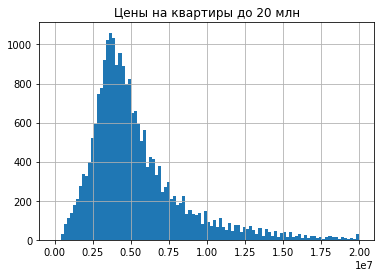

In [58]:
plt.title('Цены на квартиры до 20 млн')
good_data['last_price'].hist(bins = 100, range=(0,20000000))

Подавляющее число объявлений с ценой до 20 млн, из них бОльшую долю занимает диапазон 2,5-5 млн.
Также видим выбросы с нереальной ценой за квартиру. Можно аналогично с площадью отсечь экземпляры с ценой более 15 млн. Не отрицаем спрос на такую недвижимость, но более логично анализировать ее в рамках отдельного исследования как Элитную например и не замешивать с массовым рынком.

In [59]:
len(good_data.query('last_price > 15000000'))

706

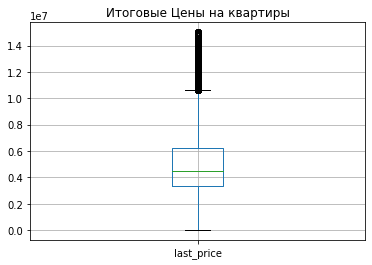

count      22202
mean     5113271
std      2644106
min        12190
25%      3350000
50%      4500000
75%      6250000
max     14999999
Name: last_price, dtype: float64

In [60]:
#минус 706 объявлений
good_data=good_data.query('last_price < 15000000')

plt.title('Итоговые Цены на квартиры')
good_data.boxplot(column='last_price')
plt.show()
good_data['last_price'].describe()

Также привлекает внимание выбросы с очень маленькой стоимостью, минимум начинается от 12 тысяч, столько квартира не может стоить.

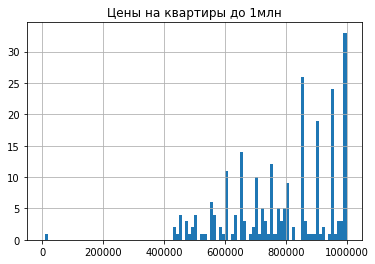

In [61]:
plt.title('Цены на квартиры до 1млн')
good_data['last_price'].hist(bins = 100, range=(0,1000000))

Теперь видно выброс, посмотрим на него вживую.

In [62]:
good_data.query('last_price < 200000')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier,square_price,weekday_exposition,month_exposition,year_exposition,floor_type
8734,8793,7,12190,109,2019-03-20,2,3,25,32,25,False,False,False,40,False,Санкт-Петербург,36421,9176,1,805,0,nan,8,0,0,112,2,3,2019,2


100-метровая двушка в Питере недалеко от центра? Кажется, здесь просто забыли 3 нуля добавить, 12 млн за такую неджвижимость является адекватной ценой. Исправим это, не забыв про цену квадратного метра.

In [63]:
good_data.loc[data['last_price'] == 12190,'square_price'] = 112000
good_data.loc[data['last_price'] == 12190,'last_price'] = 12190000
good_data.query('last_price == 12190000')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier,square_price,weekday_exposition,month_exposition,year_exposition,floor_type
8734,8793,7,12190000,109,2019-03-20,2,3,25,32,25,False,False,False,40,False,Санкт-Петербург,36421,9176,1,805,0,nan,8,0,0,112000,2,3,2019,2
16462,16579,19,12190000,100,2017-11-23,3,3,16,51,5,False,False,False,25,True,Санкт-Петербург,36765,11777,0,nan,0,nan,241,1,0,121900,3,11,2017,0


Теперь проанализируем количество комнат

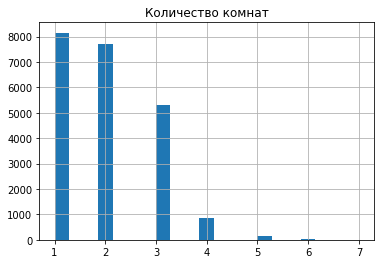

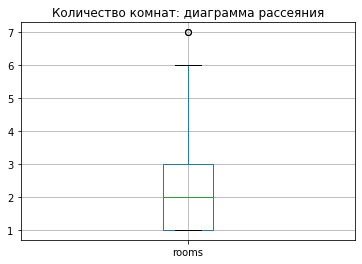

count   22202
mean        2
std         1
min         1
25%         1
50%         2
75%         3
max         7
Name: rooms, dtype: float64

In [64]:
plt.title('Количество комнат')
good_data['rooms'].hist(bins =21)
plt.show()

plt.title('Количество комнат: диаграмма рассеяния')
good_data.boxplot(column='rooms')
plt.show()
good_data['rooms'].describe()

Большинство квартир огранричивается 3-мя комнатами, чаще всего встречаются однушки и двушки. 4-х комнатных меньше тысячи, 5 и 6 комнтаные совсем едничны. 

А 7ми-комнатные квартиры тоже можно убрать как выбросы, они также почти не представлены на рынке. Зачем вообще нужно столько комнат...

In [65]:
good_data.query('rooms==7')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier,square_price,weekday_exposition,month_exposition,year_exposition,floor_type
14497,14603,12,13490000,101,2018-07-31,7,nan,4,66,2,True,False,False,9,False,Санкт-Петербург,24309,3876,3,574,3,325,50,1,0,134095,1,7,2018,0
17860,17991,19,12000000,125,2017-02-09,7,3,6,82,5,False,False,False,24,False,Санкт-Петербург,24697,5265,1,407,0,nan,138,1,0,96000,3,2,2017,0


In [66]:
good_data=good_data.query('rooms<7')
good_data.query('rooms==7')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier,square_price,weekday_exposition,month_exposition,year_exposition,floor_type


Теперь посмотрим на высоту потолков:

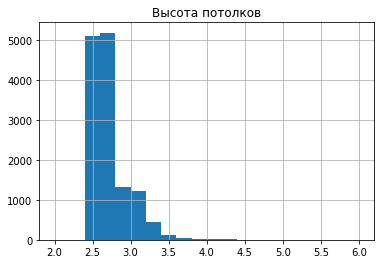

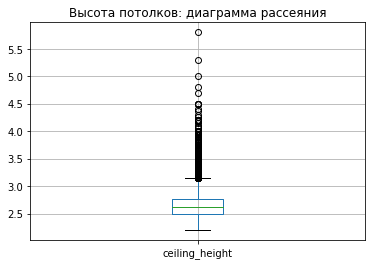

count   13541.00
mean        2.70
std         0.24
min         2.20
25%         2.50
50%         2.62
75%         2.76
max         5.80
Name: ceiling_height, dtype: float64

In [67]:
#вернем отображение с 2мя знаками после запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)  

plt.title('Высота потолков')
good_data['ceiling_height'].hist(bins =20, range=(2,6))
plt.show()

plt.title('Высота потолков: диаграмма рассеяния')
good_data.boxplot(column='ceiling_height')
plt.show()
good_data['ceiling_height'].describe()

В предобработке мы уже тогда заметили нехорошие данные по потолкам (меньше двух и больше 6) и исправили их, хотя по диаграмме размаха потолок высотой 3,2 метра считается выбросом - поэтому отсечем эти объявления.

Также помним, что у части объявлений они не заполнены, и этот график не для 100% объявлений, но в целом корректно характеризует распределение.

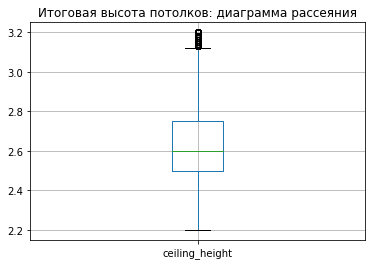

In [68]:
good_data=good_data.query('ceiling_height <= 3.2')

plt.title('Итоговая высота потолков: диаграмма рассеяния')
good_data.boxplot(column='ceiling_height')
plt.show()

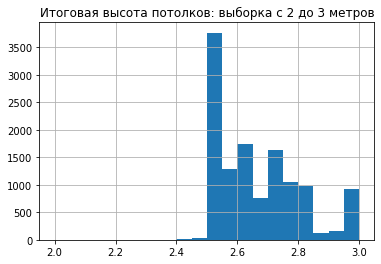

In [69]:
plt.title('Итоговая высота потолков: выборка с 2 до 3 метров')
good_data['ceiling_height'].hist(bins =20, range=(2,3))
plt.show()

2,5 метра - самая популярная высота потолков в питере.

Теперь посмотрим на время продажи квартиры.

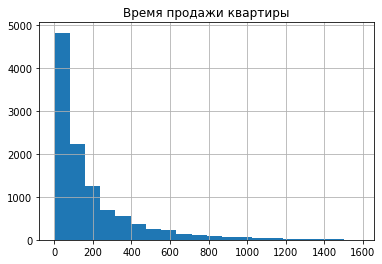

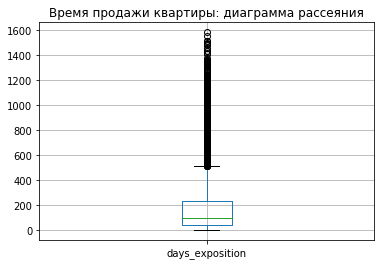

count   10993
mean      182
std       221
min         1
25%        44
50%        97
75%       232
max      1580
Name: days_exposition, dtype: float64

In [70]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

plt.title('Время продажи квартиры')
good_data['days_exposition'].hist(bins =20)
plt.show()

plt.title('Время продажи квартиры: диаграмма рассеяния')
good_data.boxplot(column='days_exposition')
plt.show()
good_data['days_exposition'].describe()

Судя по графику, нормальное время для продажи квартиры - 3 месяца. Но есть и выбросы: некоторые квартиры уходят за 1 день и есть объявления, которые висели годами.

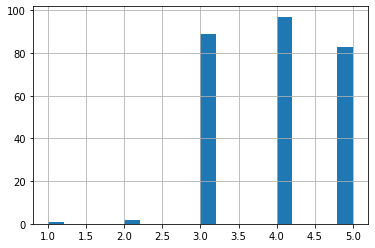

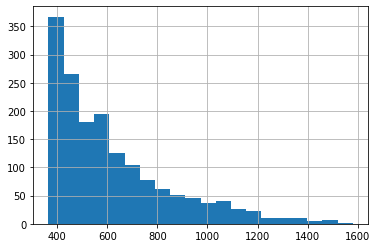

In [71]:
good_data['days_exposition'].hist(bins =20, range=(1,5))
plt.show()
good_data['days_exposition'].hist(bins =20, range=(365,1580))
plt.show()

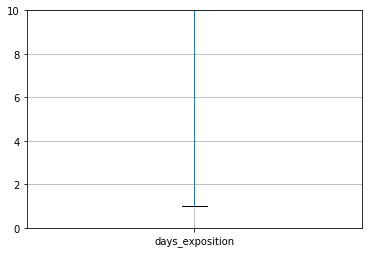

In [72]:
plt.ylim(0, 10)
good_data.boxplot(column='days_exposition')
plt.show()

Статистика нам говорит, что если объявление висело 1 день - то это в пределах нормы. Но верить, что эти квартиры купили за 1 день, не хочется, ведь квартира - это не горячий пирожок. Может, человек передумал или это объявление снял автоматом антифрод или модератор. Поэтому отсечем такие квартиры.

Что касается слишком больших значений: да, квартиру можно продавать очень долго, этот процесс бывает затяжным и напряженным, и не всем обязательно срочно ее продавать. Вот здесь послушаемся диаграммы размаха и уберем объявления с периодом размещения свыше 500 дней. Если объявление висит более 2х лет, то скорее всего либо это неликвид, либо объект уже продали, а снять объявление забыли.

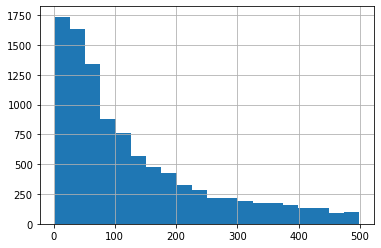

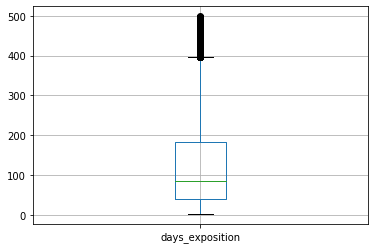

count   10029
mean      127
std       119
min         2
25%        39
50%        85
75%       182
max       499
Name: days_exposition, dtype: float64

In [73]:
good_data = good_data.query('days_exposition > 1 and days_exposition < 500')

good_data['days_exposition'].hist(bins =20)
plt.show()
good_data.boxplot(column='days_exposition')
plt.show()
good_data['days_exposition'].describe()

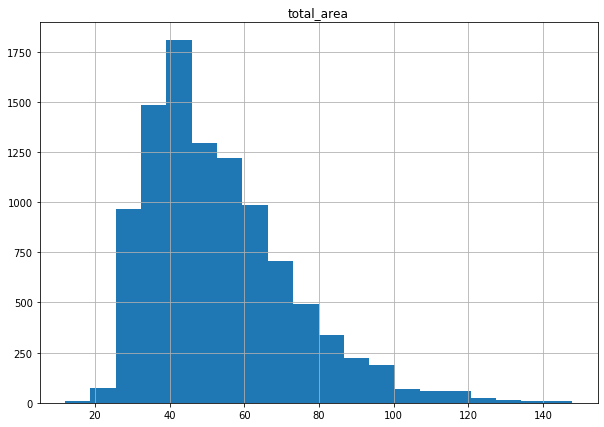

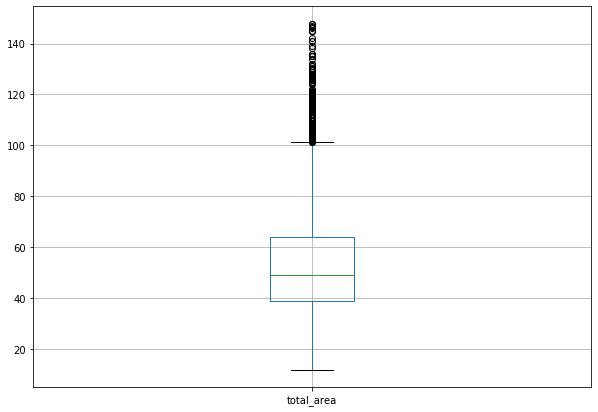

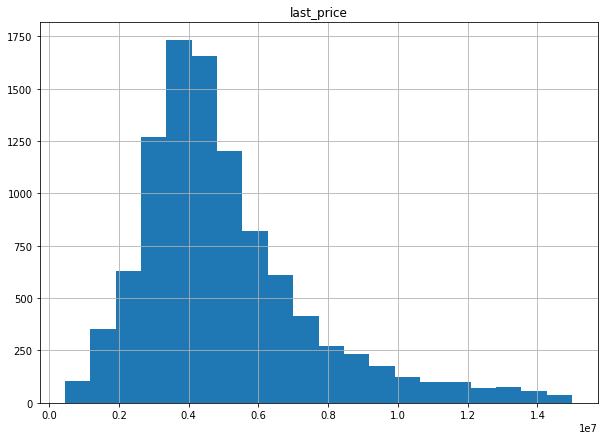

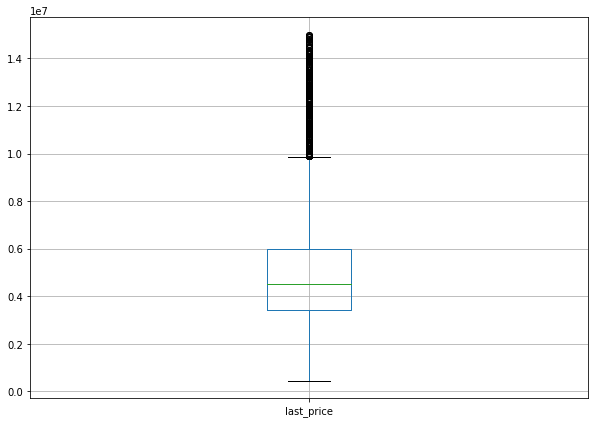

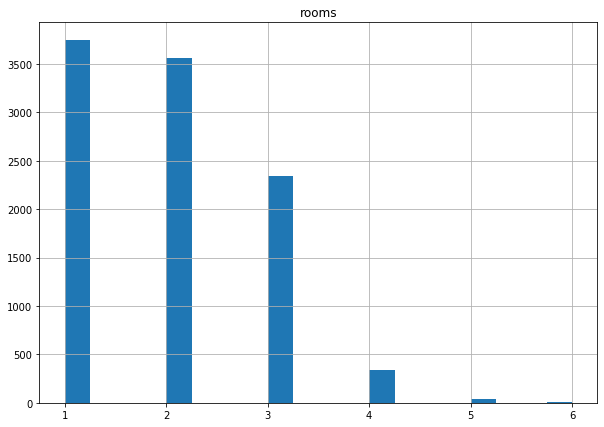

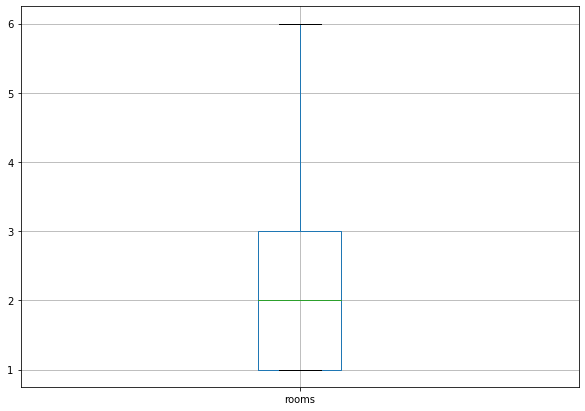

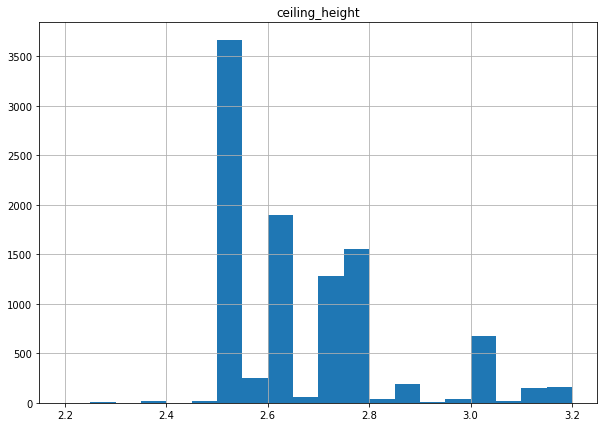

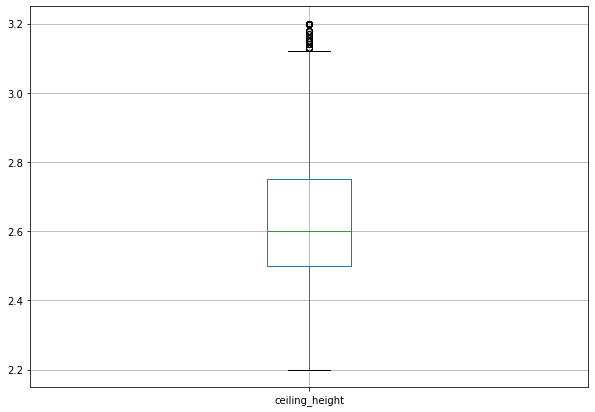

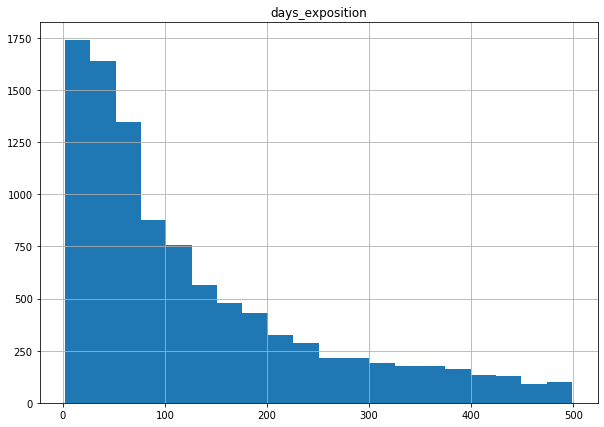

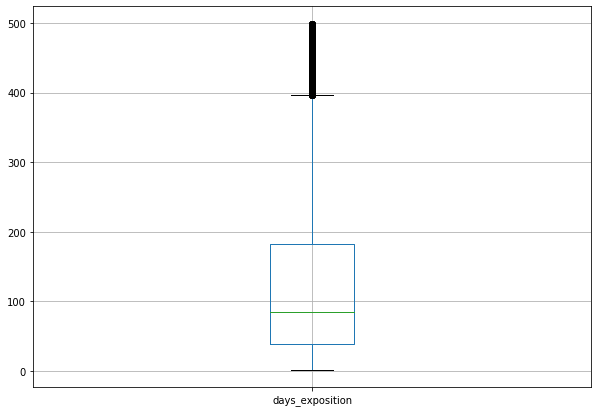

In [74]:
#итоговые данные
cols = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for col in cols:
    plt.figure(figsize=(10,7))
    plt.title(col)
    good_data[col].hist(bins = 20)
    plt.show()
    plt.figure(figsize=(10,7))
    good_data.boxplot(column=col)
    plt.show()

По очищенным данным можно сделать следующие выводы:
0) Средняя продолжительность продажи - 127 дней, медиана - 85.
1) Если квартира ушла за +-90 дней - это норма
2) Нужно быть готовым ждать и до полугода - такое тоже нередко бывает. Если квартира висит на продаже дольше, то скорее всего что-то не так: либо с ценой, либо с вашим объектом недвижимости.
3) Если вы продали квартиру менее чем за 30 дней, то это очень быстро: либо вы продешевили, либо квартира просто огонь.

Теперь посмотрим зависимость цены квартиры от площади, числа комнат, удаленности от центра, этажа (первого или последнего), а также даты размещения (дня недели, месяца и года). Воспользуемся методом .corr()

In [75]:
print('Корреляция цены с площадью {:.2f}'.format(good_data['last_price'].corr(good_data['total_area'])))
print('Корреляция цены с количеством комнат {:.2f}'.format(good_data['last_price'].corr(good_data['rooms'])))
print('Корреляция цены с расстоянием до центра {:.2f}'.format(good_data['last_price'].corr(good_data['cityCenters_nearest'])))
print('Корреляция цены с видом этажа {:.3f}'.format(good_data['last_price'].corr(good_data['floor_type'])))


Корреляция цены с площадью 0.74
Корреляция цены с количеством комнат 0.46
Корреляция цены с расстоянием до центра -0.32
Корреляция цены с видом этажа -0.103


Самая сильная связь цены получилась с площадью, это совершенно логично - чем больше площадь квартиры, тем дороже она стоит.
Корреляция с количеством комнат и расстоянием до центра есть, но она на порядок ниже. Значит эти факторы влияют на цену, но не так сильно.
Формула корреляции как-будто не взяла зависимость от типа этажа, попробуем постоить диаграмму рассеивания.

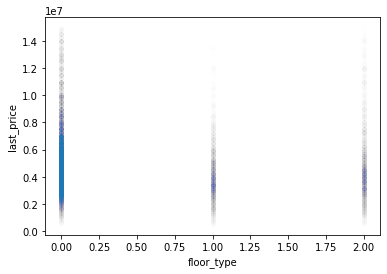

In [76]:
good_data.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.003)
plt.show()

Напомним, что 1 - первый этаж, 2 - последний, 0 - другие.
Здесь явно можно увидеть, что первые и последние этажи зачастую не стоят так много, как остальные. Все-таки они не такие популярные, поэтому чаще всего его цена на порядок ниже.

In [77]:
print('Корреляция цены с годом размещения {:.2f}'.format(good_data['last_price'].corr(good_data['year_exposition'])))
print('Корреляция цены с месяцем размещения {:.2f}'.format(good_data['last_price'].corr(good_data['month_exposition'])))
print('Корреляция цены с днем размещения {:.2f}'.format(good_data['last_price'].corr(good_data['weekday_exposition'])))

Корреляция цены с годом размещения -0.01
Корреляция цены с месяцем размещения 0.01
Корреляция цены с днем размещения -0.02


Корреляции цены с датами размещения также мы не нашли, попробуем обнаружить ее на графике

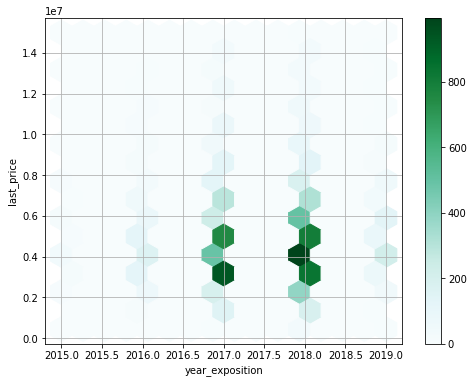

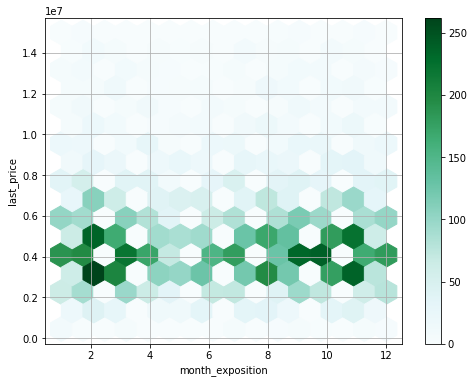

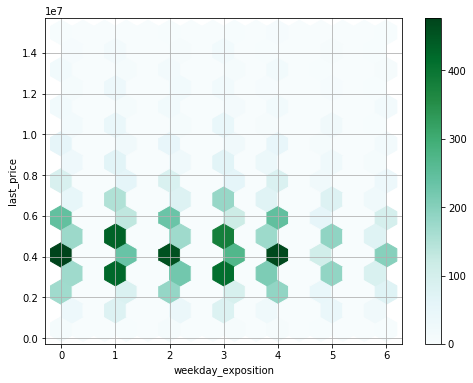

In [78]:
good_data.plot(x='year_exposition', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.show()
good_data.plot(x='month_exposition', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.show()
good_data.plot(x='weekday_exposition', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.show()

На графиках тоже особой зависимости не прослеживается, можно только отметить:
- бОльшая часть объявлений приходится на 2017-2018 годы
- активность размещения объявлений приходится на февраль-март и сентябрь-ноябрь (видимо, летом, как и везде, активность снижается)
- и в будние дни также размещают больше объявлений, чем в выходные. 

Но попробуем отследить хотя бы среднюю цену, сгруппировав эти данные по сводным таблицам

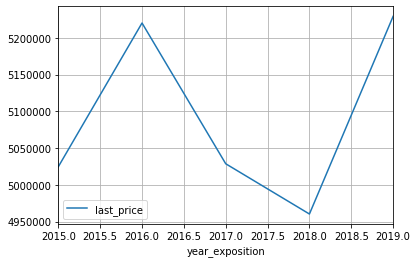

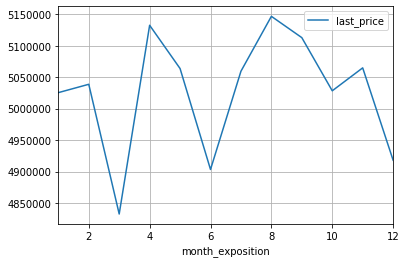

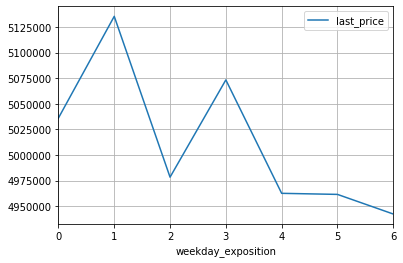

In [79]:
good_data.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(grid=True)
plt.show()
good_data.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot(grid=True)
plt.show()
good_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').plot(grid=True)
plt.show()

Здесь уже что-то вырисовывется:
- в 2017-2018 году наблюдался спад рынка
- в субботу и воскресенье почему-то квартиры выкладывают в среднем дешевле
- в течение года нет какой-то определенной зависимости, средний минимум в марте, максимум в августе

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [80]:
#находим топ 10
print(good_data['locality_name'].value_counts().head(10))

#записываем список в переменную
top10 = good_data['locality_name'].value_counts().head(10)

#делаем срез и сразу проверяем
good_data_top10 = good_data.query('locality_name in @top10.index')
good_data_top10['locality_name'].value_counts()

Санкт-Петербург    6814
Всеволожск          197
Мурино              189
Шушары              175
Колпино             168
Кудрово             160
Пушкин              156
Парголово           115
Гатчина             112
Петергоф            108
Name: locality_name, dtype: int64


Санкт-Петербург    6814
Всеволожск          197
Мурино              189
Шушары              175
Колпино             168
Кудрово             160
Пушкин              156
Парголово           115
Гатчина             112
Петергоф            108
Name: locality_name, dtype: int64

In [81]:
good_data_top10.pivot_table(index='locality_name', values='square_price', aggfunc='mean').sort_values(by='square_price', ascending = False)

,square_price
locality_name,
Санкт-Петербург,106125
Пушкин,98614
Кудрово,95312
Парголово,89570
Мурино,87725
Петергоф,82945
Шушары,78372
Колпино,74903
Гатчина,69850


Топ 3 по стоимости квадратного метра:
1) Санкт-Петербург
2) Пушкин
3) Кудрово

Самая низкая цена во Всеволожске, Гатчине и Колпино.

Теперь выделите квартиры в Санкт-Петербург и выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [82]:
#выведем датафрейм с только питерскими объявлениями
data_spb = good_data.query('locality_name == "Санкт-Петербург"')
data_spb['cityCenters_km'] = (data_spb['cityCenters_nearest']/1000).round()
data_spb.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_multiplier,kitchen_area_multiplier,square_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_km
4,4,2,10000000,100,2018-06-19,2,3,14,32,13,False,False,False,41,False,Санкт-Петербург,31856,8098,2,112,1,48,121,0,0,100000,1,6,2018,0,8
9,9,18,5400000,61,2017-02-26,3,2,9,44,7,False,False,False,6,True,Санкт-Петербург,50898,15008,0,nan,0,nan,289,1,0,88525,6,2,2017,0,15
10,10,5,5050000,40,2017-11-16,1,3,12,20,3,False,False,False,8,False,Санкт-Петербург,38357,13878,1,310,2,553,137,1,0,127525,3,11,2017,0,14
16,16,11,6700000,82,2017-11-23,3,3,5,56,1,False,False,False,9,False,Санкт-Петербург,22108,10698,3,420,0,nan,397,1,0,81707,3,11,2017,1,11
18,18,8,3250000,31,2017-01-27,1,2,5,19,2,False,False,False,6,True,Санкт-Петербург,44060,10842,1,759,0,nan,168,1,0,104839,4,1,2017,0,11


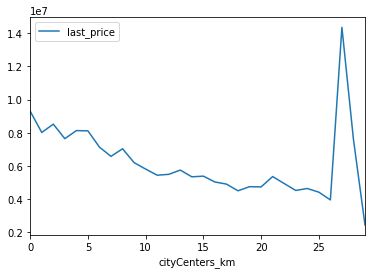

In [83]:
data_spb.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean').plot()
plt.show()

После 5 км цена начинает снижаться, поэтому возмьем эту границу для центральной зоны.

Проанализируем эту территорию: площадь, цена, число комнат, высота потолков. 
Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

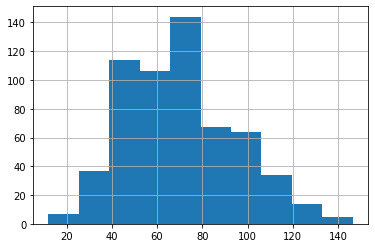

count   592
mean     70
std      24
min      12
25%      50
50%      69
75%      85
max     146
Name: total_area, dtype: float64


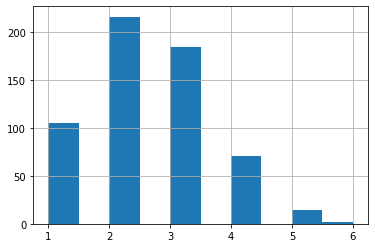

count   592
mean      2
std       1
min       1
25%       2
50%       2
75%       3
max       6
Name: rooms, dtype: float64


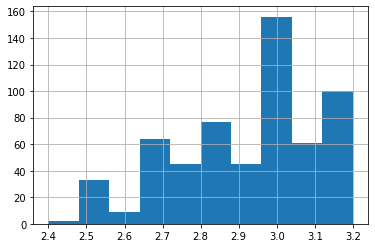

count   592
mean      3
std       0
min       2
25%       3
50%       3
75%       3
max       3
Name: ceiling_height, dtype: float64


In [84]:
spb_center= data_spb.query('cityCenters_km <= 5')
spb_center['total_area'].hist()
plt.show()
print(spb_center['total_area'].describe())
spb_center['rooms'].hist()
plt.show()
print(spb_center['rooms'].describe())
spb_center['ceiling_height'].hist()
plt.show()
print(spb_center['ceiling_height'].describe())

Какие выводы тут можно сделать:
- площадь квартир в центре не намного, но больше, чем в среднем по территории (69 против 52)
- количество комнат в квартирах на порядок больше, однушки здесь встречаются намного реже, чуть ли не с той же частотой, что и 4хкомнатные
- высота потолков тоже превышает средние значения по городу, чаще всего здесь встречаются 3хметровые потолки, а городская медиана 2,5м один из самых редких значений. 

Эти факты объясняются тем, что в центе Санкт-Петербурга преобладает старый жилой фонд дореволюционной постройки. Тогда люди строили совсем по-другому: жилые помещения были больше, выше, просторнее и, чего уж там таить, шикарнее. Сейчас уже так не строят жилые дома, все оптимизируется и сжимается.

И посмотрим на зависимость цены квартиры от числа комнат, этажа, удалённости от центра, даты размещения объявления.

In [85]:

print('Корреляция цены с количеством комнат {:.2f}'.format(spb_center['last_price'].corr(spb_center['rooms'])))
print('Корреляция цены с этажом {:.2f}'.format(spb_center['last_price'].corr(spb_center['floor'])))
print('Корреляция цены с расстоянием до центра {:.2f}'.format(spb_center['last_price'].corr(spb_center['cityCenters_nearest'])))
print('Корреляция цены с датой размещения {:.2f}'.format(spb_center['last_price'].corr(spb_center['year_exposition'])))

Корреляция цены с количеством комнат 0.41
Корреляция цены с этажом 0.22
Корреляция цены с расстоянием до центра -0.02
Корреляция цены с датой размещения 0.02


- Есть небольшая связь с количеством комнат: чем их больше, тем дороже. Это логично, и эта связь практически такая же, как в целом по городу.
- Еще слабее связь с этажом квартиры, но она есть
- Связь с расстоянием до центра и датой размещения функция корреляции также не взяла, попробуем найти ее на графиках

Для даты публикации:


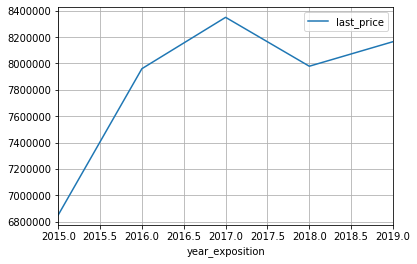

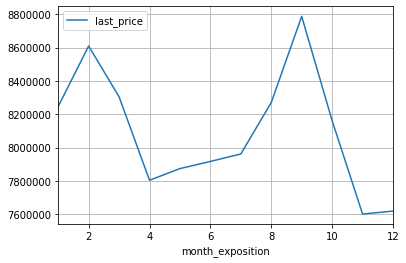

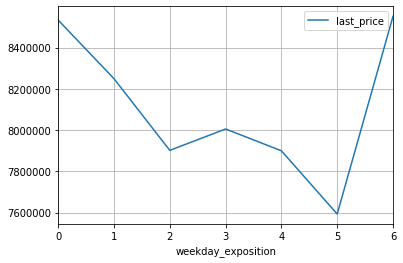

Для типа этажа:


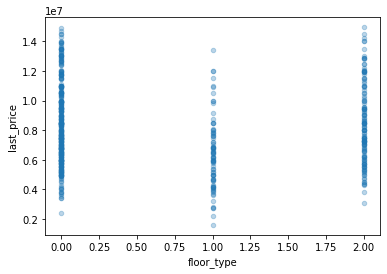

In [86]:
print('Для даты публикации:')
spb_center.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(grid=True)
plt.show()
spb_center.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot(grid=True)
plt.show()
spb_center.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').plot(grid=True)
plt.show()

print('Для типа этажа:')
spb_center.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.3)
plt.show()

- недвижимость в центре города не заметила общий спад 17-18 года, здесь можно отметить ее ликвидность, динамика ее цены в целом положительная
- в месячной динамике тоже нет особых связей, только в конце года снижается средняя цена квартиры
- с воскресенья по субботу выкладывают квартиры по нарастанию цены
- в центре первый этаж также непопулярен, а последний этаж практически ничем не уступает остальным! это связано с невысокой этажностью домов и это не так критично жить на последнем, а также где-то может открываться хороший вид на крышы Петербурга

## Общий вывод

Мы проанализировали базу объявлений квартир Санкт-Петербурга. В ней было достаточно много пропусков, которые в основном образовывались от пользователей, которые не аполняли некоторые поля. Здесь можно дать совет разработчикам сайта доработать форму заполнения, чтобы пользователи не могли опубликовать объявления с пропущенными значениями. И также можно им сделать подсказки в заполнении: например, если он не знает какай высота потолков, можно сделать всплывающую подсказку "в вашем доме обычно отмечают высоту потолков в столько-то метров, и т.д.

В целом 75% составляют квартиры с площадью не более 67м2, медиана проходит по площади в 51м2. 
Медианное время продажи квартиры составляет 90 дней, что является неплохим показателем ликвидности недвижимости в регионе. 
Каких-то аномальных и необычных факторов, влияющих на цену квартир, обнаружено не было. По рынку наблюдался спад в 2017-2018 гг, в 2019 уже динамика цены пошла вверх. Самая недорогая недвижимость представлена во Всеволожске, Гатчине и Колпино, а цены в СПБ, Пушкине и Кудрово наоборот самые кусающие. 

При анализе недвижимости в центральной части Питера можно отметить особую ликвидность этой недвидимости: ее цена за 5 лет выросла примерно на 20%, когда цена в среднем по региону поднялась не больше 5%. И эти квартиры имеют свои характерные особенности: у них больше площадь и количество комнат, выше потолки. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод